In [26]:
import pandas as pd
import numpy as np

# Load Dataset

In [27]:
dataset_train = pd.read_csv('train.csv')

In [28]:
y=dataset_train['Severity']

In [29]:
xg = dataset_train.drop(['Severity'] , axis = 1)

In [30]:
x = xg.drop(['Accident_ID'], axis = 1)

In [31]:
x.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [32]:
x['Turbulence_In_gforces'][2]

0.322604399567255

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(y)
from sklearn.preprocessing import StandardScaler
scalery = StandardScaler().fit(pd.DataFrame(Y))
y = scalery.transform(pd.DataFrame(Y))

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [34]:
x['Turbulence_In_gforces'][2]

0.322604399567255

# Preprocessing the data(removing the outliers and standardising the data)

In [35]:
from sklearn.preprocessing import StandardScaler
def preprocess(x):
    for i in range(0,len(x)):
        x['Total_Safety_Complaints'][i]=np.power(x['Total_Safety_Complaints'][i],1/2)
        x['Adverse_Weather_Metric'][i]=np.power(x['Adverse_Weather_Metric'][i],1/5)
        x['Cabin_Temperature'][i]=np.sqrt(x['Cabin_Temperature'][i])
        x['Turbulence_In_gforces'][i]=np.sqrt(x['Turbulence_In_gforces'][i])
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    x.loc[:, x.columns != 'Violations'] = x.loc[:, x.columns != 'Violations'][~((x.loc[:, x.columns != 'Violations'] < (Q1 - 1.5 * IQR)) |(x.loc[:, x.columns != 'Violations'] > (Q3 + 1.5 * IQR))).any(axis=1)]
    scalerX = StandardScaler().fit(x)
    x_train = scalerX.transform(x)
    return x_train

In [36]:
from sklearn.model_selection import train_test_split
x_train=preprocess(x)

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/macbook/anaconda3/li

# Plotting Violation Column (Preprocessing has almost made all feature distribution normal)

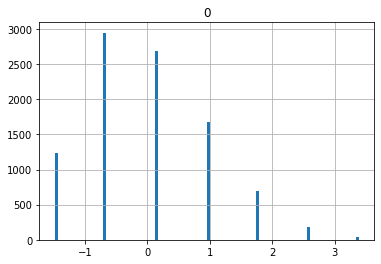

In [40]:
z = []
for i in range(0,len(x_train)):
    z.append(x_train[i][2])
z=pd.DataFrame(z)
hist = z.hist(bins=100)
x_tr=pd.DataFrame(x_train)

/Users/macbook/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/macbook/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


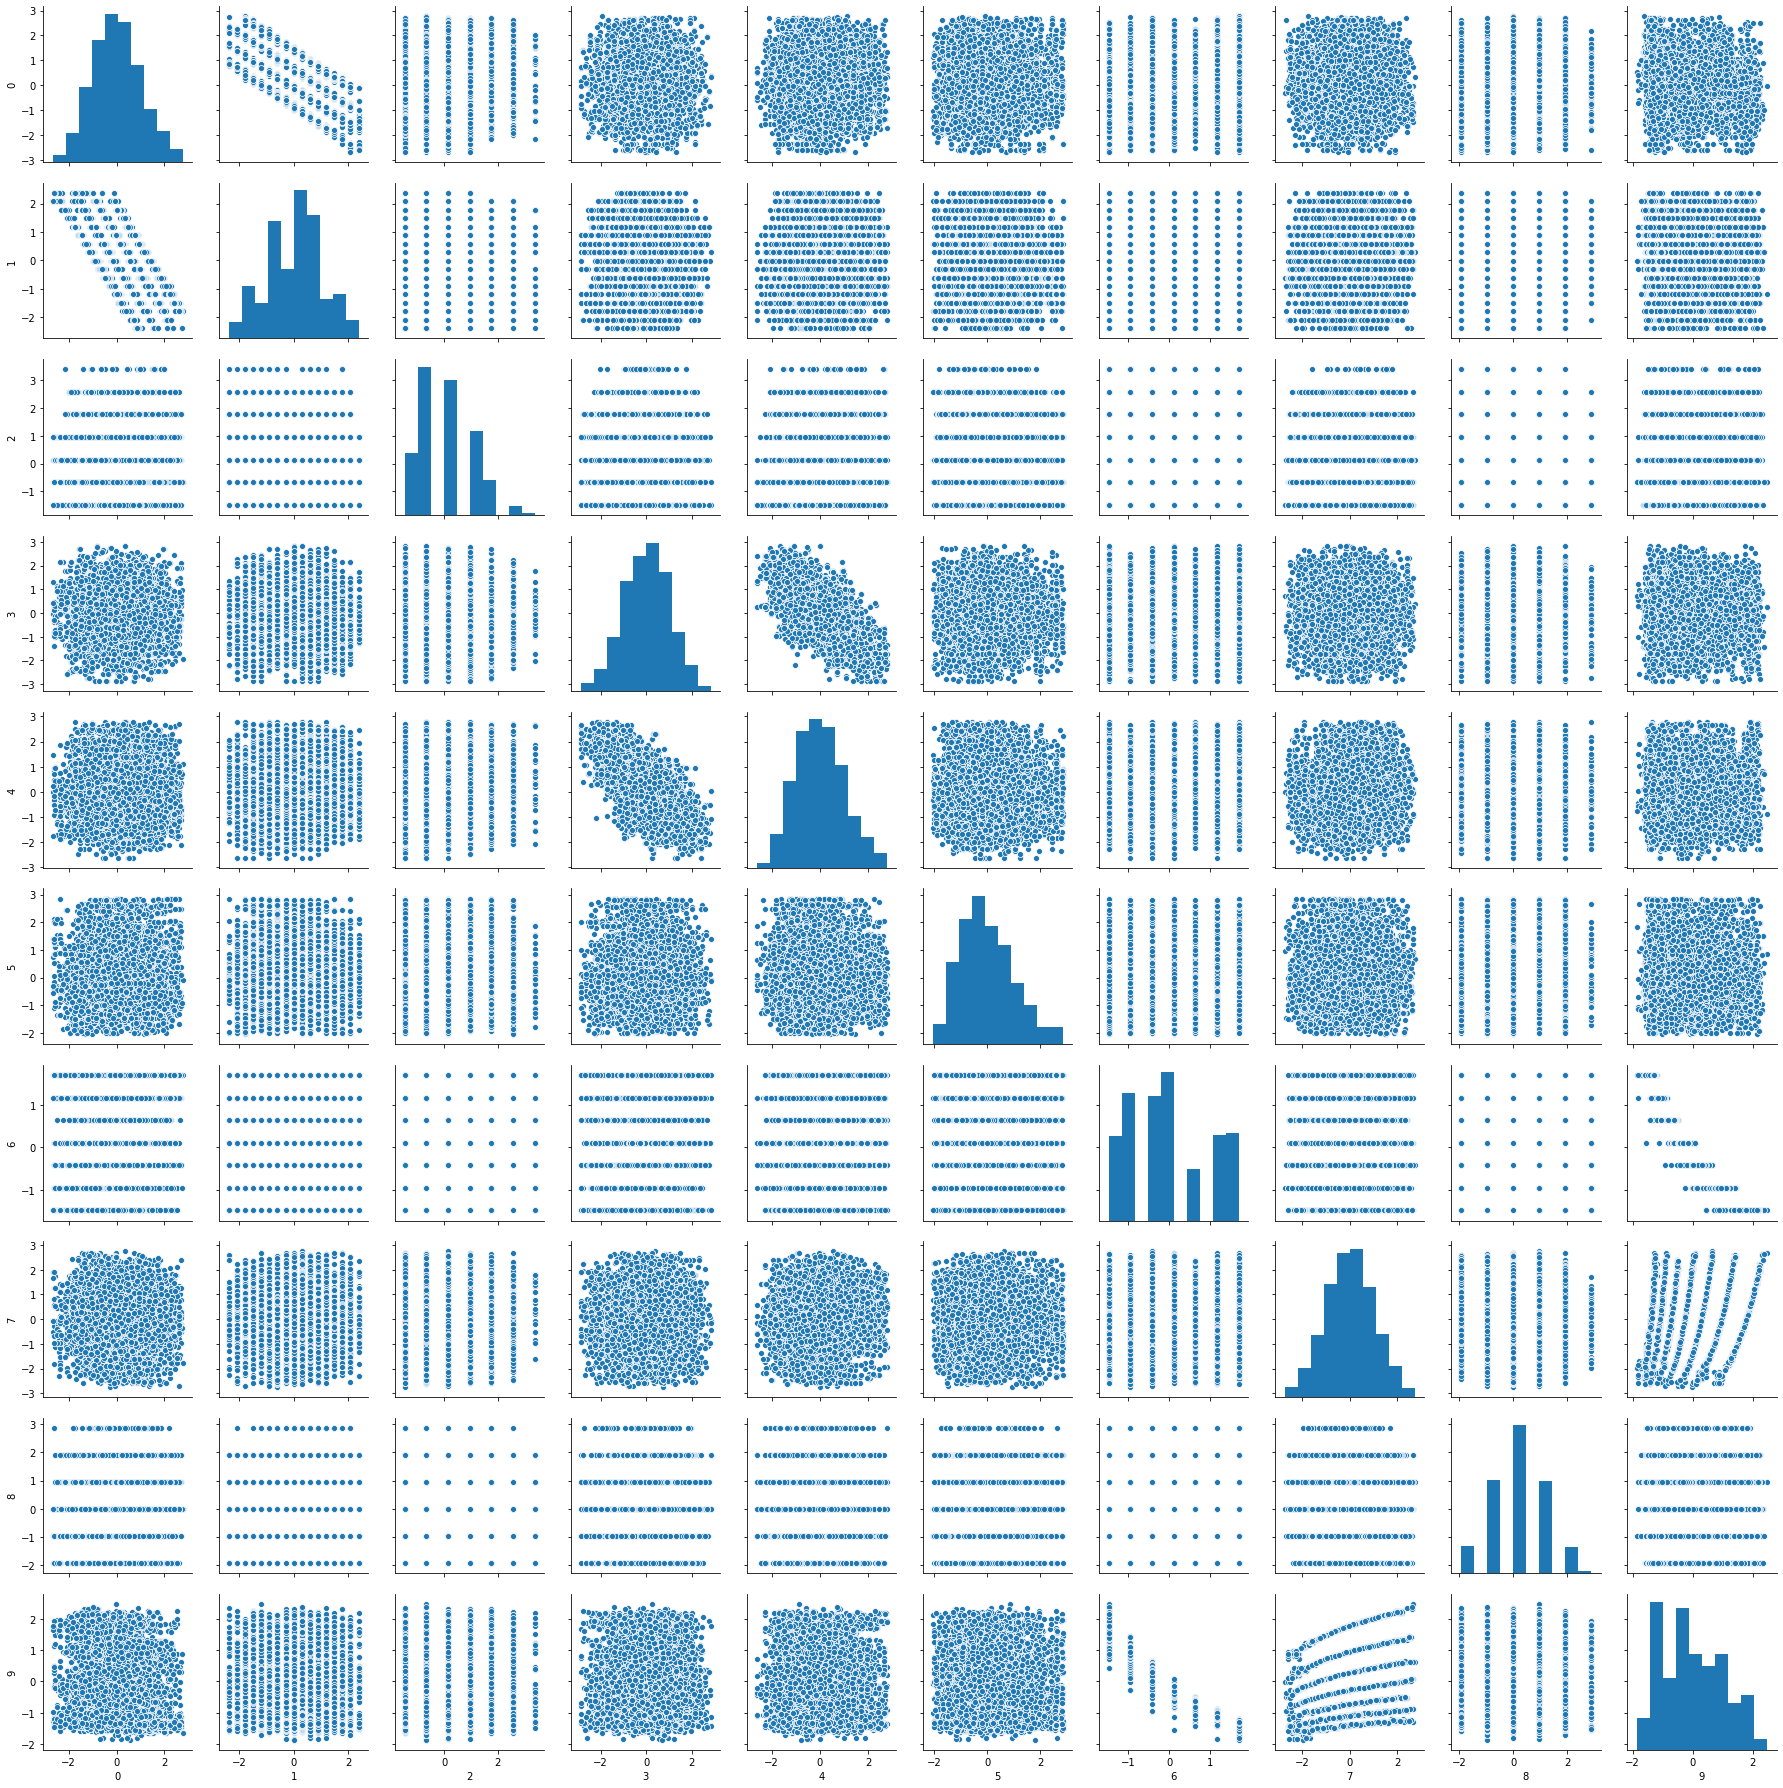

In [41]:
import seaborn as sns
x_t=pd.DataFrame(x_train)
sns.pairplot(x_t.loc[:,x_t.dtypes == 'float64'])

# Outliers have been removed(choose suitable quantile range for the  max score)

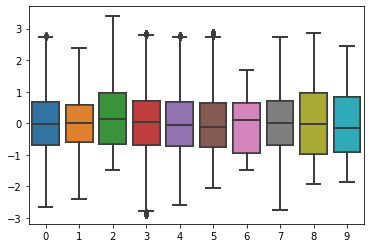

In [42]:
for i in range(0,10):
    sns.boxplot(data = x_tr) 


In [43]:
d = {0 : 'Highly_Fatal_And_Damaging' , 1: 'Minor_Damage_And_Injuries', 2 : 'Significant_Damage_And_Fatalities',3 : 'Significant_Damage_And_Serious_Injuries'}


In [44]:
test_dataset = pd.read_csv('test.csv')
test_x = test_dataset.drop(['Accident_ID'] , axis = 1)


In [45]:
test_x1 = preprocess(test_x)


/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/macbook/anaconda3/li

In [46]:
d = {0 : 'Highly_Fatal_And_Damaging' , 1: 'Minor_Damage_And_Injuries', 2 : 'Significant_Damage_And_Fatalities',3 : 'Significant_Damage_And_Serious_Injuries'}

In [47]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
model1 = XGBClassifier(
 objective = 'count:poissonsurvival:cox',
 nthread = 4,
 scale_pos_weight = 1,
 seed = 20,

boosting_type= 'gbdt',
colsample_bylevel= 1,
colsample_bytree= 1,
gamma= 0.3,
learning_rate= 0.118,
max_depth= 17,
min_child_weight= 0.5,
n_estimators= 1000,
reg_lambda= 0.05,
silent= False,
subsample= 1,
n_jobs=4
)
model1.fit(x_train, Y)

XGBClassifier(base_score=0.5, booster='gbtree', boosting_type='gbdt',
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       gamma=0.3, learning_rate=0.118, max_delta_step=0, max_depth=17,
       min_child_weight=0.5, missing=None, n_estimators=1000, n_jobs=4,
       nthread=4, objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=0.05, scale_pos_weight=1, seed=20, silent=False,
       subsample=1, verbosity=1)

In [23]:
accid=[]
for i in range(0,len(test_dataset)):
    accid.append(test_dataset['Accident_ID'][i])
answer1 = model1.predict(test_x1)


In [24]:
A1=[]
for i in range(0,len(answer1)):
    s=answer1[i]
    if(int(s)==0):
        A1.append(['Highly_Fatal_And_Damaging'])
    elif(s==1):
        A1.append(['Minor_Damage_And_Injuries'])

    elif(s==2):
        A1.append(['Significant_Damage_And_Fatalities'])

    elif(s==3):
        A1.append(['Significant_Damage_And_Serious_Injuries'])

In [25]:
A1 = pd.DataFrame(A1)
A1.columns = ['Severity']
A1['Accident_ID'] = accid
columnsTitles = ["Accident_ID","Severity"]
A1=A1.reindex(columns = columnsTitles)
A1.to_csv('Saswat_submission_7_copy.csv', sep=',', encoding = 'utf-8',index = False)

# RandomizedSearchCV specific to the data and model

In [35]:
import time
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
clf = xgb.XGBClassifier()
param_grid = {
        'objective' : ['multi:softprob','reg:squarederror','reg:squaredlogerror','reg:logistic','count:poisson'
                  'survival:cox','multi:softmax','rank:ndcg','rank:map','reg:gamma','reg:tweedie'],
        'boosting_type' : ['dart','goss','gbdt','rf'],
        'silent': [False],
        'max_depth': [10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,40],
        'learning_rate': [0.1,0.11,0.116,0.117,0.118,0.119,0.12,0.121,0.122,0.123,0.124,0.125,0.13],
        'subsample': [1.0],
        'colsample_bytree': [1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0,0.5, 1.0, 3.0,4, 5.0,6, 7.0, 10.0],
        'gamma': [0, 0.25,0.3,0.5,0.5,0.55,0.6,0.7, 1.0],
        'reg_lambda': [0.01,0.004,0.05,0.006,0.1,0.45,0.5,0.55, 1.0,1.1 ],
        'n_estimators': [100],
        'scale_pos_weight' : [1]}
fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [(x_train, Y)]}
rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            fit_params=fit_params,
                            scoring='neg_log_loss', refit=False, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(x_train, Y)
print("Randomized search time:", time.time() - search_time_start)
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.5, silent=False, scale_pos_weight=1, reg_lambda=1.1, objective=count:poissonsurvival:cox, n_estimators=100, min_child_weight=1.0, max_depth=17, learning_rate=0.116, gamma=0.5, colsample_bytree=0.74, colsample_bylevel=0.9, boosting_type=gbdt 
[0]	validation_0-mlogloss:1.2938
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.16791


/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[2]	validation_0-mlogloss:1.05523
[3]	validation_0-mlogloss:1.00256
[4]	validation_0-mlogloss:0.916435
[5]	validation_0-mlogloss:0.853212
[6]	validation_0-mlogloss:0.807034
[7]	validation_0-mlogloss:0.774591
[8]	validation_0-mlogloss:0.752145
[9]	validation_0-mlogloss:0.697445
[10]	validation_0-mlogloss:0.667417
[11]	validation_0-mlogloss:0.636066
[12]	validation_0-mlogloss:0.615509
[13]	validation_0-mlogloss:0.581654
[14]	validation_0-mlogloss:0.552312
[15]	validation_0-mlogloss:0.522771
[16]	validation_0-mlogloss:0.51036
[17]	validation_0-mlogloss:0.492533
[18]	validation_0-mlogloss:0.482104
[19]	validation_0-mlogloss:0.469726
[20]	validation_0-mlogloss:0.454817
[21]	validation_0-mlogloss:0.438763
[22]	validation_0-mlogloss:0.429084
[23]	validation_0-mlogloss:0.411106
[24]	validation_0-mlogloss:0.39171
[25]	validation_0-mlogloss:0.380013
[26]	validation_0-mlogloss:0.368517
[27]	validation_0-mlogloss:0.356518
[28]	validation_0-mlogloss:0.34823
[29]	validation_0-mlogloss:0.341278
[30]	

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[1]	validation_0-mlogloss:1.20959
[2]	validation_0-mlogloss:1.13019
[3]	validation_0-mlogloss:1.08086
[4]	validation_0-mlogloss:1.01267
[5]	validation_0-mlogloss:0.938924
[6]	validation_0-mlogloss:0.866965
[7]	validation_0-mlogloss:0.817606
[8]	validation_0-mlogloss:0.77459
[9]	validation_0-mlogloss:0.748882
[10]	validation_0-mlogloss:0.719048
[11]	validation_0-mlogloss:0.69029
[12]	validation_0-mlogloss:0.661286
[13]	validation_0-mlogloss:0.632136
[14]	validation_0-mlogloss:0.610153
[15]	validation_0-mlogloss:0.593765
[16]	validation_0-mlogloss:0.572196
[17]	validation_0-mlogloss:0.552142
[18]	validation_0-mlogloss:0.535447
[19]	validation_0-mlogloss:0.522661
[20]	validation_0-mlogloss:0.515082
[21]	validation_0-mlogloss:0.502149
[22]	validation_0-mlogloss:0.48622
[23]	validation_0-mlogloss:0.46814
[24]	validation_0-mlogloss:0.459536
[25]	validation_0-mlogloss:0.450884
[26]	validation_0-mlogloss:0.431732
[27]	validation_0-mlogloss:0.424173
[28]	validation_0-mlogloss:0.408913
[29]	vali

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.2221
[2]	validation_0-mlogloss:1.16453
[3]	validation_0-mlogloss:1.10568
[4]	validation_0-mlogloss:1.03644
[5]	validation_0-mlogloss:0.968405
[6]	validation_0-mlogloss:0.927488
[7]	validation_0-mlogloss:0.865533
[8]	validation_0-mlogloss:0.812432
[9]	validation_0-mlogloss:0.775926
[10]	validation_0-mlogloss:0.754606
[11]	validation_0-mlogloss:0.71522
[12]	validation_0-mlogloss:0.686843
[13]	validation_0-mlogloss:0.660909
[14]	validation_0-mlogloss:0.646071
[15]	validation_0-mlogloss:0.622268
[16]	validation_0-mlogloss:0.601347
[17]	validation_0-mlogloss:0.585326
[18]	validation_0-mlogloss:0.564213
[19]	validation_0-mlogloss:0.549981
[20]	validation_0-mlogloss:0.527567
[21]	validation_0-mlogloss:0.514902
[22]	validation_0-mlogloss:0.500951
[23]	validation_0-mlogloss:0.487406
[24]	validation_0-mlogloss:0.47264
[25]	validation_0-mlogloss:0.460985
[26]	validation_0-mlogloss:0.446409
[27]	valida

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.16956
[2]	validation_0-mlogloss:1.08325
[3]	validation_0-mlogloss:1.00652
[4]	validation_0-mlogloss:0.936767
[5]	validation_0-mlogloss:0.877092
[6]	validation_0-mlogloss:0.82323
[7]	validation_0-mlogloss:0.777799
[8]	validation_0-mlogloss:0.735933
[9]	validation_0-mlogloss:0.695296
[10]	validation_0-mlogloss:0.661299
[11]	validation_0-mlogloss:0.632591
[12]	validation_0-mlogloss:0.606188
[13]	validation_0-mlogloss:0.580087
[14]	validation_0-mlogloss:0.55485
[15]	validation_0-mlogloss:0.532028
[16]	validation_0-mlogloss:0.508024
[17]	validation_0-mlogloss:0.485795
[18]	validation_0-mlogloss:0.469819
[19]	validation_0-mlogloss:0.451951
[20]	validation_0-mlogloss:0.437754
[21]	validation_0-mlogloss:0.425921
[22]	validation_0-mlogloss:0.41242
[23]	validation_0-mlogloss:0.400118
[24]	validation_0-mlogloss:0.391037
[25]	validation_0-mlogloss:0.380436
[26]	validation_0-mlogloss:0.371416
[27]	valid

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.1158
[2]	validation_0-mlogloss:1.01629
[3]	validation_0-mlogloss:0.929729
[4]	validation_0-mlogloss:0.853968
[5]	validation_0-mlogloss:0.786083
[6]	validation_0-mlogloss:0.732098
[7]	validation_0-mlogloss:0.680571
[8]	validation_0-mlogloss:0.638643
[9]	validation_0-mlogloss:0.59928
[10]	validation_0-mlogloss:0.565199
[11]	validation_0-mlogloss:0.536759
[12]	validation_0-mlogloss:0.508159
[13]	validation_0-mlogloss:0.483936
[14]	validation_0-mlogloss:0.461372
[15]	validation_0-mlogloss:0.44144
[16]	validation_0-mlogloss:0.421853
[17]	validation_0-mlogloss:0.405145
[18]	validation_0-mlogloss:0.392084
[19]	validation_0-mlogloss:0.379019
[20]	validation_0-mlogloss:0.365873
[21]	validation_0-mlogloss:0.354864
[22]	validation_0-mlogloss:0.344084
[23]	validation_0-mlogloss:0.334441
[24]	validation_0-mlogloss:0.325779
[25]	validation_0-mlogloss:0.314865
[26]	validation_0-mlogloss:0.307628
[27]	vali

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.18012
[2]	validation_0-mlogloss:1.1015
[3]	validation_0-mlogloss:1.02522
[4]	validation_0-mlogloss:0.957144
[5]	validation_0-mlogloss:0.887469
[6]	validation_0-mlogloss:0.83419
[7]	validation_0-mlogloss:0.78421
[8]	validation_0-mlogloss:0.740898
[9]	validation_0-mlogloss:0.698599
[10]	validation_0-mlogloss:0.66675
[11]	validation_0-mlogloss:0.634476
[12]	validation_0-mlogloss:0.608497
[13]	validation_0-mlogloss:0.58556
[14]	validation_0-mlogloss:0.557715
[15]	validation_0-mlogloss:0.535453
[16]	validation_0-mlogloss:0.51392
[17]	validation_0-mlogloss:0.494281
[18]	validation_0-mlogloss:0.47896
[19]	validation_0-mlogloss:0.466696
[20]	validation_0-mlogloss:0.454504
[21]	validation_0-mlogloss:0.438335
[22]	validation_0-mlogloss:0.426545
[23]	validation_0-mlogloss:0.411773
[24]	validation_0-mlogloss:0.403477
[25]	validation_0-mlogloss:0.393224
[26]	validation_0-mlogloss:0.383323
[27]	validatio

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.23624
[2]	validation_0-mlogloss:1.1663
[3]	validation_0-mlogloss:1.1225
[4]	validation_0-mlogloss:1.06995
[5]	validation_0-mlogloss:1.01307
[6]	validation_0-mlogloss:0.951513
[7]	validation_0-mlogloss:0.919828
[8]	validation_0-mlogloss:0.875241
[9]	validation_0-mlogloss:0.853707
[10]	validation_0-mlogloss:0.827259
[11]	validation_0-mlogloss:0.805777
[12]	validation_0-mlogloss:0.781442
[13]	validation_0-mlogloss:0.76604
[14]	validation_0-mlogloss:0.743658
[15]	validation_0-mlogloss:0.733378
[16]	validation_0-mlogloss:0.714265
[17]	validation_0-mlogloss:0.695303
[18]	validation_0-mlogloss:0.681137
[19]	validation_0-mlogloss:0.667195
[20]	validation_0-mlogloss:0.660047
[21]	validation_0-mlogloss:0.651083
[22]	validation_0-mlogloss:0.64034
[23]	validation_0-mlogloss:0.620056
[24]	validation_0-mlogloss:0.608857
[25]	validation_0-mlogloss:0.601119
[26]	validation_0-mlogloss:0.578838
[27]	validati

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.26853
[2]	validation_0-mlogloss:1.2146
[3]	validation_0-mlogloss:1.178
[4]	validation_0-mlogloss:1.13605
[5]	validation_0-mlogloss:1.08904
[6]	validation_0-mlogloss:1.0389
[7]	validation_0-mlogloss:1.01538
[8]	validation_0-mlogloss:0.976758
[9]	validation_0-mlogloss:0.956982
[10]	validation_0-mlogloss:0.936759
[11]	validation_0-mlogloss:0.9193
[12]	validation_0-mlogloss:0.89731
[13]	validation_0-mlogloss:0.881982
[14]	validation_0-mlogloss:0.862981
[15]	validation_0-mlogloss:0.853869
[16]	validation_0-mlogloss:0.835273
[17]	validation_0-mlogloss:0.819198
[18]	validation_0-mlogloss:0.805625
[19]	validation_0-mlogloss:0.79233
[20]	validation_0-mlogloss:0.7872
[21]	validation_0-mlogloss:0.780052
[22]	validation_0-mlogloss:0.769446
[23]	validation_0-mlogloss:0.752048
[24]	validation_0-mlogloss:0.742771
[25]	validation_0-mlogloss:0.73529
[26]	validation_0-mlogloss:0.716069
[27]	validation_0-mlog

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.10677
[2]	validation_0-mlogloss:1.00728
[3]	validation_0-mlogloss:0.91551
[4]	validation_0-mlogloss:0.840375
[5]	validation_0-mlogloss:0.768442
[6]	validation_0-mlogloss:0.711777
[7]	validation_0-mlogloss:0.659531
[8]	validation_0-mlogloss:0.616998
[9]	validation_0-mlogloss:0.575626
[10]	validation_0-mlogloss:0.541755
[11]	validation_0-mlogloss:0.511148
[12]	validation_0-mlogloss:0.483549
[13]	validation_0-mlogloss:0.45789
[14]	validation_0-mlogloss:0.427794
[15]	validation_0-mlogloss:0.40788
[16]	validation_0-mlogloss:0.38911
[17]	validation_0-mlogloss:0.370418
[18]	validation_0-mlogloss:0.356091
[19]	validation_0-mlogloss:0.342627
[20]	validation_0-mlogloss:0.327309
[21]	validation_0-mlogloss:0.316399
[22]	validation_0-mlogloss:0.305589
[23]	validation_0-mlogloss:0.293484
[24]	validation_0-mlogloss:0.285084
[25]	validation_0-mlogloss:0.275152
[26]	validation_0-mlogloss:0.26882
[27]	valida

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.20234
[2]	validation_0-mlogloss:1.12099
[3]	validation_0-mlogloss:1.06728
[4]	validation_0-mlogloss:1.00731
[5]	validation_0-mlogloss:0.940861
[6]	validation_0-mlogloss:0.874893
[7]	validation_0-mlogloss:0.836253
[8]	validation_0-mlogloss:0.79308
[9]	validation_0-mlogloss:0.76887
[10]	validation_0-mlogloss:0.736599
[11]	validation_0-mlogloss:0.712998
[12]	validation_0-mlogloss:0.687472
[13]	validation_0-mlogloss:0.663685
[14]	validation_0-mlogloss:0.640592
[15]	validation_0-mlogloss:0.627249
[16]	validation_0-mlogloss:0.607498
[17]	validation_0-mlogloss:0.587085
[18]	validation_0-mlogloss:0.571448
[19]	validation_0-mlogloss:0.558041
[20]	validation_0-mlogloss:0.549302
[21]	validation_0-mlogloss:0.539626
[22]	validation_0-mlogloss:0.526379
[23]	validation_0-mlogloss:0.509449
[24]	validation_0-mlogloss:0.498522
[25]	validation_0-mlogloss:0.491183
[26]	validation_0-mlogloss:0.47509
[27]	valida

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.23637
[2]	validation_0-mlogloss:1.16758
[3]	validation_0-mlogloss:1.12851
[4]	validation_0-mlogloss:1.07075
[5]	validation_0-mlogloss:0.996099
[6]	validation_0-mlogloss:0.931902
[7]	validation_0-mlogloss:0.887207
[8]	validation_0-mlogloss:0.847293
[9]	validation_0-mlogloss:0.824912
[10]	validation_0-mlogloss:0.801347
[11]	validation_0-mlogloss:0.776293
[12]	validation_0-mlogloss:0.749497
[13]	validation_0-mlogloss:0.723255
[14]	validation_0-mlogloss:0.700032
[15]	validation_0-mlogloss:0.689788
[16]	validation_0-mlogloss:0.670627
[17]	validation_0-mlogloss:0.650266
[18]	validation_0-mlogloss:0.634821
[19]	validation_0-mlogloss:0.623226
[20]	validation_0-mlogloss:0.617387
[21]	validation_0-mlogloss:0.605604
[22]	validation_0-mlogloss:0.587897
[23]	validation_0-mlogloss:0.568222
[24]	validation_0-mlogloss:0.557327
[25]	validation_0-mlogloss:0.549083
[26]	validation_0-mlogloss:0.533109
[27]	val

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.24351
[2]	validation_0-mlogloss:1.17692
[3]	validation_0-mlogloss:1.13558
[4]	validation_0-mlogloss:1.08646
[5]	validation_0-mlogloss:1.03721
[6]	validation_0-mlogloss:0.984032
[7]	validation_0-mlogloss:0.956752
[8]	validation_0-mlogloss:0.915756
[9]	validation_0-mlogloss:0.895814
[10]	validation_0-mlogloss:0.870874
[11]	validation_0-mlogloss:0.852748
[12]	validation_0-mlogloss:0.831149
[13]	validation_0-mlogloss:0.816097
[14]	validation_0-mlogloss:0.797389
[15]	validation_0-mlogloss:0.787963
[16]	validation_0-mlogloss:0.769459
[17]	validation_0-mlogloss:0.75367
[18]	validation_0-mlogloss:0.740621
[19]	validation_0-mlogloss:0.727354
[20]	validation_0-mlogloss:0.721443
[21]	validation_0-mlogloss:0.713338
[22]	validation_0-mlogloss:0.698861
[23]	validation_0-mlogloss:0.681526
[24]	validation_0-mlogloss:0.671933
[25]	validation_0-mlogloss:0.664306
[26]	validation_0-mlogloss:0.646036
[27]	valid

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.23149
[2]	validation_0-mlogloss:1.16607
[3]	validation_0-mlogloss:1.12351
[4]	validation_0-mlogloss:1.0635
[5]	validation_0-mlogloss:1.00394
[6]	validation_0-mlogloss:0.936898
[7]	validation_0-mlogloss:0.902299
[8]	validation_0-mlogloss:0.861764
[9]	validation_0-mlogloss:0.837916
[10]	validation_0-mlogloss:0.8087
[11]	validation_0-mlogloss:0.782123
[12]	validation_0-mlogloss:0.75357
[13]	validation_0-mlogloss:0.73024
[14]	validation_0-mlogloss:0.707375
[15]	validation_0-mlogloss:0.696702
[16]	validation_0-mlogloss:0.676633
[17]	validation_0-mlogloss:0.659631
[18]	validation_0-mlogloss:0.64335
[19]	validation_0-mlogloss:0.630715
[20]	validation_0-mlogloss:0.623301
[21]	validation_0-mlogloss:0.611472
[22]	validation_0-mlogloss:0.599076
[23]	validation_0-mlogloss:0.578762
[24]	validation_0-mlogloss:0.570777
[25]	validation_0-mlogloss:0.561865
[26]	validation_0-mlogloss:0.5445
[27]	validation_0

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.20062
[2]	validation_0-mlogloss:1.12232
[3]	validation_0-mlogloss:1.07081
[4]	validation_0-mlogloss:1.00513
[5]	validation_0-mlogloss:0.934217
[6]	validation_0-mlogloss:0.86527
[7]	validation_0-mlogloss:0.81439
[8]	validation_0-mlogloss:0.772816
[9]	validation_0-mlogloss:0.744951
[10]	validation_0-mlogloss:0.712438
[11]	validation_0-mlogloss:0.682316
[12]	validation_0-mlogloss:0.652664
[13]	validation_0-mlogloss:0.624699
[14]	validation_0-mlogloss:0.599911
[15]	validation_0-mlogloss:0.582727
[16]	validation_0-mlogloss:0.561771
[17]	validation_0-mlogloss:0.542422
[18]	validation_0-mlogloss:0.525862
[19]	validation_0-mlogloss:0.511873
[20]	validation_0-mlogloss:0.502624
[21]	validation_0-mlogloss:0.489352
[22]	validation_0-mlogloss:0.476765
[23]	validation_0-mlogloss:0.45886
[24]	validation_0-mlogloss:0.448413
[25]	validation_0-mlogloss:0.43885
[26]	validation_0-mlogloss:0.421101
[27]	validat

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.20548
[2]	validation_0-mlogloss:1.14258
[3]	validation_0-mlogloss:1.08045
[4]	validation_0-mlogloss:1.00854
[5]	validation_0-mlogloss:0.936477
[6]	validation_0-mlogloss:0.893672
[7]	validation_0-mlogloss:0.829777
[8]	validation_0-mlogloss:0.774266
[9]	validation_0-mlogloss:0.737711
[10]	validation_0-mlogloss:0.71606
[11]	validation_0-mlogloss:0.675183
[12]	validation_0-mlogloss:0.646516
[13]	validation_0-mlogloss:0.617973
[14]	validation_0-mlogloss:0.603493
[15]	validation_0-mlogloss:0.57751
[16]	validation_0-mlogloss:0.557495
[17]	validation_0-mlogloss:0.540445
[18]	validation_0-mlogloss:0.518979
[19]	validation_0-mlogloss:0.50514
[20]	validation_0-mlogloss:0.483209
[21]	validation_0-mlogloss:0.470428
[22]	validation_0-mlogloss:0.457148
[23]	validation_0-mlogloss:0.442773
[24]	validation_0-mlogloss:0.426554
[25]	validation_0-mlogloss:0.415827
[26]	validation_0-mlogloss:0.399295
[27]	valida

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.08827
[2]	validation_0-mlogloss:0.977536
[3]	validation_0-mlogloss:0.884207
[4]	validation_0-mlogloss:0.800876
[5]	validation_0-mlogloss:0.729508
[6]	validation_0-mlogloss:0.671429
[7]	validation_0-mlogloss:0.618178
[8]	validation_0-mlogloss:0.574043
[9]	validation_0-mlogloss:0.533535
[10]	validation_0-mlogloss:0.498252
[11]	validation_0-mlogloss:0.467974
[12]	validation_0-mlogloss:0.440786
[13]	validation_0-mlogloss:0.415933
[14]	validation_0-mlogloss:0.392686
[15]	validation_0-mlogloss:0.370777
[16]	validation_0-mlogloss:0.351367
[17]	validation_0-mlogloss:0.3345
[18]	validation_0-mlogloss:0.319089
[19]	validation_0-mlogloss:0.305021
[20]	validation_0-mlogloss:0.292084
[21]	validation_0-mlogloss:0.281749
[22]	validation_0-mlogloss:0.271975
[23]	validation_0-mlogloss:0.261991
[24]	validation_0-mlogloss:0.254922
[25]	validation_0-mlogloss:0.24694
[26]	validation_0-mlogloss:0.240559
[27]	val

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.23694
[2]	validation_0-mlogloss:1.17502
[3]	validation_0-mlogloss:1.1367
[4]	validation_0-mlogloss:1.08388
[5]	validation_0-mlogloss:1.03096
[6]	validation_0-mlogloss:0.967642
[7]	validation_0-mlogloss:0.934095
[8]	validation_0-mlogloss:0.897781
[9]	validation_0-mlogloss:0.875189
[10]	validation_0-mlogloss:0.847904
[11]	validation_0-mlogloss:0.823499
[12]	validation_0-mlogloss:0.793915
[13]	validation_0-mlogloss:0.77786
[14]	validation_0-mlogloss:0.75731
[15]	validation_0-mlogloss:0.748697
[16]	validation_0-mlogloss:0.729696
[17]	validation_0-mlogloss:0.714538
[18]	validation_0-mlogloss:0.701672
[19]	validation_0-mlogloss:0.688462
[20]	validation_0-mlogloss:0.682214
[21]	validation_0-mlogloss:0.670924
[22]	validation_0-mlogloss:0.660511
[23]	validation_0-mlogloss:0.639423
[24]	validation_0-mlogloss:0.631642
[25]	validation_0-mlogloss:0.624565
[26]	validation_0-mlogloss:0.60418
[27]	validati

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.25522
[2]	validation_0-mlogloss:1.19238
[3]	validation_0-mlogloss:1.15279
[4]	validation_0-mlogloss:1.1037
[5]	validation_0-mlogloss:1.05374
[6]	validation_0-mlogloss:0.99551
[7]	validation_0-mlogloss:0.967901
[8]	validation_0-mlogloss:0.92733
[9]	validation_0-mlogloss:0.90675
[10]	validation_0-mlogloss:0.879269
[11]	validation_0-mlogloss:0.858968
[12]	validation_0-mlogloss:0.837479
[13]	validation_0-mlogloss:0.817608
[14]	validation_0-mlogloss:0.797432
[15]	validation_0-mlogloss:0.787259
[16]	validation_0-mlogloss:0.769003
[17]	validation_0-mlogloss:0.74989
[18]	validation_0-mlogloss:0.735232
[19]	validation_0-mlogloss:0.722333
[20]	validation_0-mlogloss:0.716006
[21]	validation_0-mlogloss:0.706345
[22]	validation_0-mlogloss:0.694258
[23]	validation_0-mlogloss:0.676433
[24]	validation_0-mlogloss:0.666703
[25]	validation_0-mlogloss:0.658927
[26]	validation_0-mlogloss:0.641974
[27]	validatio

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.14483
[2]	validation_0-mlogloss:1.05039
[3]	validation_0-mlogloss:0.985516
[4]	validation_0-mlogloss:0.912408
[5]	validation_0-mlogloss:0.839503
[6]	validation_0-mlogloss:0.770138
[7]	validation_0-mlogloss:0.71695
[8]	validation_0-mlogloss:0.673068
[9]	validation_0-mlogloss:0.64271
[10]	validation_0-mlogloss:0.610089
[11]	validation_0-mlogloss:0.580978
[12]	validation_0-mlogloss:0.55234
[13]	validation_0-mlogloss:0.526464
[14]	validation_0-mlogloss:0.503181
[15]	validation_0-mlogloss:0.487275
[16]	validation_0-mlogloss:0.467715
[17]	validation_0-mlogloss:0.44977
[18]	validation_0-mlogloss:0.434743
[19]	validation_0-mlogloss:0.422992
[20]	validation_0-mlogloss:0.415327
[21]	validation_0-mlogloss:0.404556
[22]	validation_0-mlogloss:0.393461
[23]	validation_0-mlogloss:0.378874
[24]	validation_0-mlogloss:0.370799
[25]	validation_0-mlogloss:0.364209
[26]	validation_0-mlogloss:0.350446
[27]	valid

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.22577
[2]	validation_0-mlogloss:1.1591
[3]	validation_0-mlogloss:1.11662
[4]	validation_0-mlogloss:1.05862
[5]	validation_0-mlogloss:0.995654
[6]	validation_0-mlogloss:0.927951
[7]	validation_0-mlogloss:0.888641
[8]	validation_0-mlogloss:0.849803
[9]	validation_0-mlogloss:0.825425
[10]	validation_0-mlogloss:0.798872
[11]	validation_0-mlogloss:0.772185
[12]	validation_0-mlogloss:0.744329
[13]	validation_0-mlogloss:0.717546
[14]	validation_0-mlogloss:0.695683
[15]	validation_0-mlogloss:0.684079
[16]	validation_0-mlogloss:0.666996
[17]	validation_0-mlogloss:0.646406
[18]	validation_0-mlogloss:0.632277
[19]	validation_0-mlogloss:0.618878
[20]	validation_0-mlogloss:0.611976
[21]	validation_0-mlogloss:0.598941
[22]	validation_0-mlogloss:0.584853
[23]	validation_0-mlogloss:0.564408
[24]	validation_0-mlogloss:0.553661
[25]	validation_0-mlogloss:0.545378
[26]	validation_0-mlogloss:0.526485
[27]	vali

Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.18722
[2]	validation_0-mlogloss:1.10119
[3]	validation_0-mlogloss:1.04859
[4]	validation_0-mlogloss:0.978106
[5]	validation_0-mlogloss:0.901184
[6]	validation_0-mlogloss:0.828594
[7]	validation_0-mlogloss:0.777009
[8]	validation_0-mlogloss:0.733299
[9]	validation_0-mlogloss:0.707048
[10]	validation_0-mlogloss:0.675997
[11]	validation_0-mlogloss:0.646343
[12]	validation_0-mlogloss:0.616798
[13]	validation_0-mlogloss:0.589525
[14]	validation_0-mlogloss:0.566182
[15]	validation_0-mlogloss:0.550878
[16]	validation_0-mlogloss:0.530759
[17]	validation_0-mlogloss:0.512313
[18]	validation_0-mlogloss:0.496406
[19]	validation_0-mlogloss:0.483423
[20]	validation_0-mlogloss:0.475918
[21]	validation_0-mlogloss:0.462813
[22]	validation_0-mlogloss:0.45058
[23]	validation_0-mlogloss:0.432754
[24]	validation_0-mlogloss:0.42387
[25]	validation_0-mlogloss:0.41592
[26]	validation_0-mlogloss:0.398272
[27]	valid

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.6min finished


#  One trick to get better scores in competition

Always try to merge different submission files obtained from different models and combine them. Take the vote on each test dataset. This will further improve the scores. Or you can just assign the class having the highest frequency in the training data to the points where two models don't give the same result.